#### __Exercise 1__

Read in the `housing.csv` data, and examine it for nulls.

In [1]:
import pandas as pd
housing_data = pd.read_csv("./data/housing/housing.csv")

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Exercise 2

Using pandas, take a random sample of 5000 rows and plot a `scatter_matrix`.  What stands out to you?  Why?  (Provide your narrative response as markdown).

In [2]:
sample = housing_data.sample(5000)

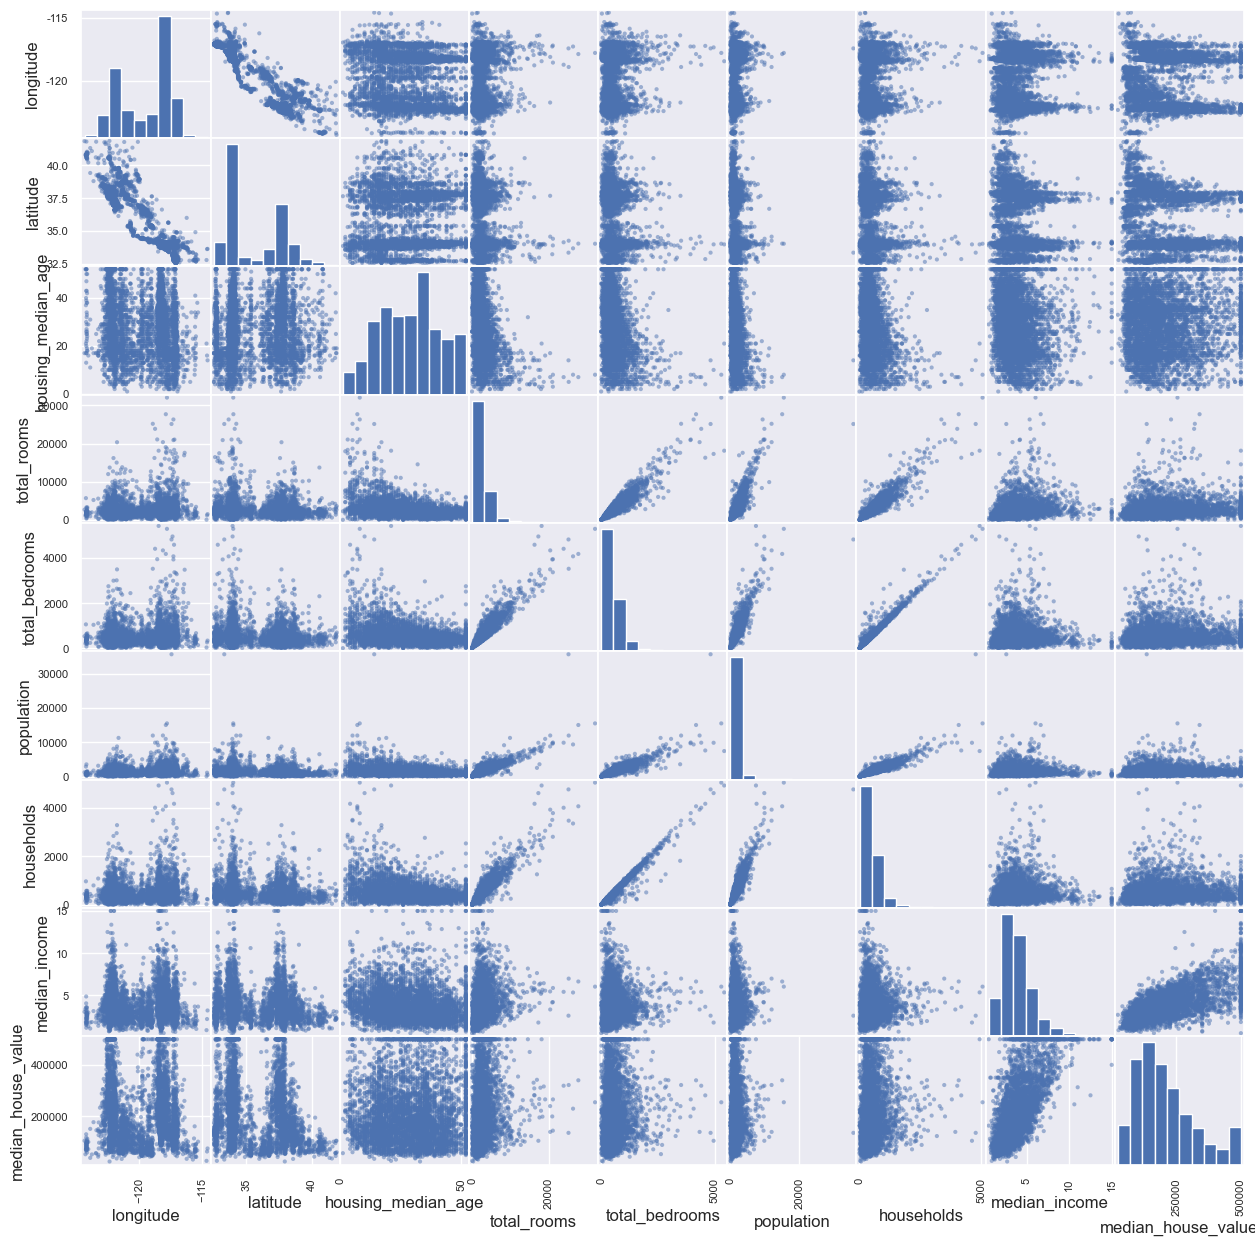

In [7]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(sample,figsize=(15,15))
plt.show()


#### __Exercise 3__

Use a pandas `groupby` operation to calculate the `mean` median house value by proximity to ocean.

In [8]:
housing_data[["median_house_value","ocean_proximity"]].groupby("ocean_proximity").mean()

,median_house_value
ocean_proximity,
<1H OCEAN,240084.285464
INLAND,124805.392001
ISLAND,380440.000000
NEAR BAY,259212.311790
NEAR OCEAN,249433.977427


#### __Exercise 4__

Plot histograms for median house values for each of the categories in `ocean_proximity`. What do you notice?  Are your histograms normally distributed?  Are there any anomalies?  Why do you think that is? 

Note, in order to get your plot to look a little nicer, you can use matplotlib's layout functions, as follows:

~~~python
import pandas as pd
import matplotlib.pyplot as plt

# Presume we have a data frame df
plt.figure()  # Increase figure size

# This line will change in order to plot different histograms for values of ocean_proximity
# However, including figsize here will help you to get a readable figure
df['column'].plot.hist(figsize=(10, 10))
plt.tight_layout()  # Adjust layout to make room for titles
plt.show()
~~~

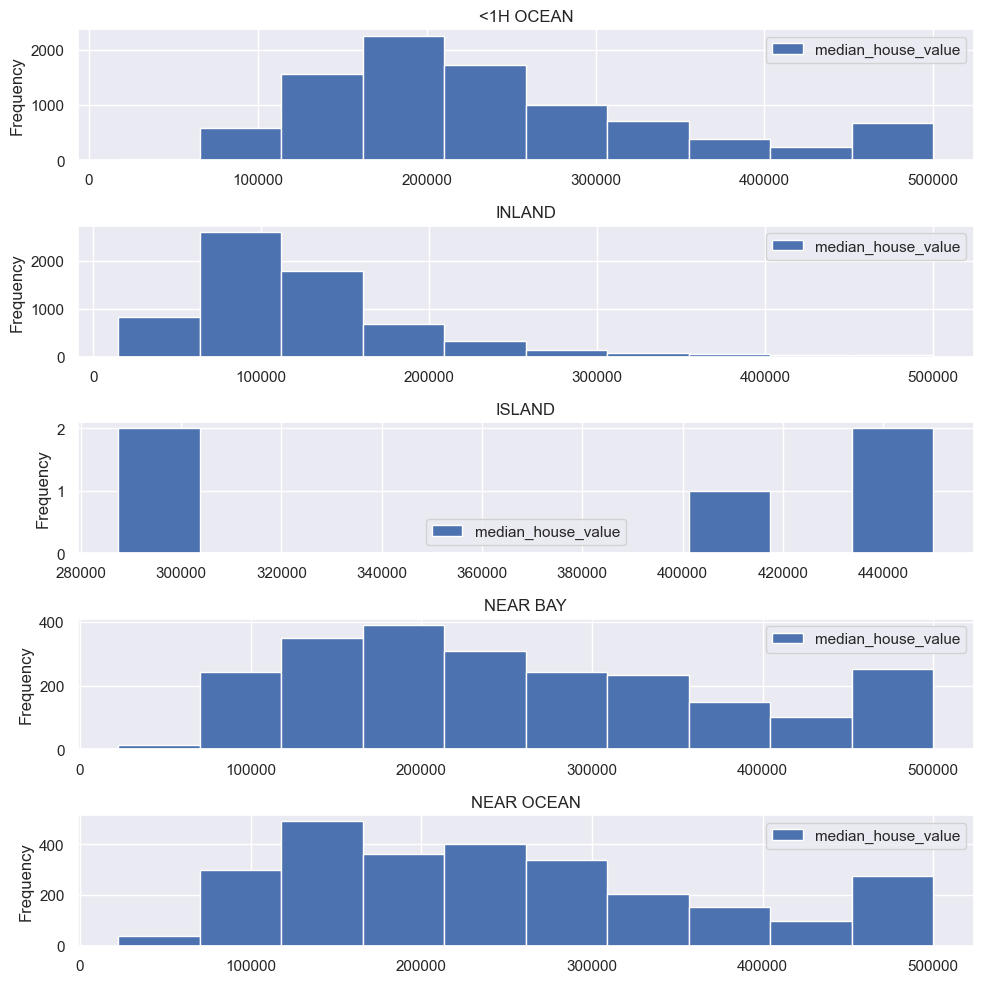

In [20]:

housing_data[["median_house_value","ocean_proximity"]].plot.hist(by="ocean_proximity",figsize=(10, 10))
plt.tight_layout()
plt.show()

#### __Exercise 5__

Create a new dataframe by removing all of the rows that have null values anywhere. How many rows did you remove?


In [22]:
clean = housing_data[~housing_data.total_bedrooms.isna()]
clean.shape[0]-housing_data.shape[0]

-207

#### __Exercise 6__

Use sklearn to create a linear regression on your cleaned data that predicts `median_house_value` (this is your target column). Do not use the `ocean_proximity` column. Report the intercept and factors.  What do these numbers mean to you?

_HINT1_: You can use pandas' `drop` function to drop the `ocean_proximity` and the target column.
_HINT2_: To figure out which feature each coefficient corresponds to, use the following:

~~~python
# Presuming your result is in the result variable
print("\n".join([f"{x[0]} : {x[1]}" for x in zip(result.feature_names_in_,result.coef_)]))
~~~

In [25]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 13.9 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.linear_model import LinearRegression

X = clean.drop(["ocean_proximity","median_house_value"],axis=1)
y = clean['median_house_value']

lr = LinearRegression(fit_intercept=True)
result = lr.fit(X,y)
print("\n".join([f"{x[0]} : {x[1]}" for x in zip(result.feature_names_in_,result.coef_)]))
print(f"Intercept is {result.intercept_}")

longitude : -42730.12045357981
latitude : -42509.736941823554
housing_median_age : 1157.900307152318
total_rooms : -8.249725069141277
total_bedrooms : 113.82070712792392
population : -38.38557804964148
households : 47.701351331023034
median_income : 40297.52171480645
Intercept is -3585395.747892311


#### __Exercise 7__

Note that we had to throw some data away because of the nulls in the data frame. To address this, we'll try manually "imputing" the missing data.  Using pandas, calculate the median value for the column where nulls appeared in your "clean" data.  Then replace the null entries with this median value.

Rerun the regression on with the imputed data. Did anything change?

In [45]:
med_br = clean.total_bedrooms.median()
housing_data[housing_data["total_bedrooms"].isna()] = med_br
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
from sklearn.linear_model import LinearRegression

X = housing_data.drop(["ocean_proximity","median_house_value"],axis=1)
y = housing_data['median_house_value']

lr = LinearRegression(fit_intercept=True)
result = lr.fit(X,y)
print("\n".join([f"{x[0]} : {x[1]}" for x in zip(result.feature_names_in_,result.coef_)]))
print(f"Intercept is {result.intercept_}")

longitude : -21120.381040269538
latitude : -22193.952838990273
housing_median_age : 1563.4882106970745
total_rooms : -15.860315058946071
total_bedrooms : 119.39344840701119
population : -36.52163351411309
households : 82.08122505128802
median_income : 45647.5594055011
Intercept is -1760493.6357678452


#### __Exercise 8__

We've got some results, but we really don't know how we're doing here.  Use `cross_val_score` with 5 folds to compare the results of the two models.  Which model is better?

_NOTE1_: `cross_val_score` can be found in the `model_selection` library.  Import it like this:

~~~python
from sklearn.model_selection import cross_val_score
~~~

_NOTE2_: You can get the mean value of an array with `np.mean` once you have imported numpy as np.

In [51]:
#Full data
from sklearn.model_selection import cross_val_score
import numpy as np

# Full data
X = housing_data.drop(["ocean_proximity","median_house_value"],axis=1)
y = housing_data['median_house_value']

lr = LinearRegression(fit_intercept=True)
np.mean(cross_val_score(lr,X,y,cv=5))

np.float64(0.6305002207004206)

In [52]:
#Clean data
X = clean.drop(["ocean_proximity","median_house_value"],axis=1)
y = clean['median_house_value']

lr = LinearRegression(fit_intercept=True)
np.mean(cross_val_score(lr,X,y,cv=5))


np.float64(0.6355815602510884)

# Exercise 9

Note that some of your features probably don't have a linear relationship with the data (see your scatter plots).  Using whichever dataset is performs better, drop the features that seem unlikely to have a linear relationship and see if you can get a better model (higher cross val score).  What is the minimum number of features you can use to achieve approximately the same performance?

In [56]:
clean2 = clean.drop(["latitude","longitude"],axis=1)
X = clean2.drop(["ocean_proximity","median_house_value"],axis=1)
y = clean2['median_house_value']

lr = LinearRegression(fit_intercept=True)
np.mean(cross_val_score(lr,X,y,cv=5))

np.float64(0.5657604173735011)

#### __Exercise 10__

One thing that might help is to get a better sense of the importance of each feature.  Unfortunately, because the features all have different magnitudes, its very hard to make direct comparisons.  Use sklearn's `StandardScaler` (see the book!) to normalize your data before you run your model.  Investigate your coefficients.  Which ones are most important (i.e. have the highest absolute magnitude)?  What have you learned (contrast your answer here with what you found in the previous exercise).

Note - make sure you scale both the target column and the features.

In [64]:
from sklearn.preprocessing import StandardScaler

housing_num = clean.drop(['ocean_proximity'],axis=1)
scaler = StandardScaler()
housing_num_scaled = scaler.fit_transform(housing_num)
housing_num_scaled

array([[-1.32731375,  1.05171726,  0.98216331, ..., -0.97683327,
         2.34516291,  2.12881864],
       [-1.32232256,  1.04235526, -0.60621017, ...,  1.67037262,
         2.33263161,  1.31362603],
       [-1.33230494,  1.03767426,  1.85576873, ..., -0.84342665,
         1.78293943,  1.25818254],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.17377773,
        -1.14317103, -0.99247676],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.39350628,
        -1.05513604, -1.05831591],
       [-0.83318561,  1.74918635, -1.00330353, ...,  0.07995643,
        -0.78060586, -1.01759959]])

In [65]:

scaled_data = pd.DataFrame(housing_num_scaled,columns=housing_num.columns)

X = scaled_data.drop(['median_house_value'],axis=1)
y = scaled_data['median_house_value']

lr = LinearRegression(fit_intercept=True)
result = lr.fit(X,y)
print("\n".join([f"{x[0]} : {x[1]}" for x in zip(result.feature_names_in_,result.coef_)]))
print(f"Intercept is {result.intercept_}")



longitude : -0.7416522705830066
latitude : -0.7867202537709282
housing_median_age : 0.12630459439156028
total_rooms : -0.1561724688968379
total_bedrooms : 0.4154898382318362
population : -0.3768234205505663
households : 0.15797708061795493
median_income : 0.6630249756021855
Intercept is 7.311305509284401e-16
